Keras提供的模型，其中分为两类：

- Sequential 顺序模型
- Model 类模型

可以通过 from keras.models import Sequential 或者 from keras.models import Model 来导入对应的模型。

Sequential 模型结构： 层（layers）的线性堆栈。简单来说，它是一个简单的线性结构，没有多余分支，是多个网络层的堆叠。

从上述代码中可以看出：

- from keras.models import Sequential 引入Sequential

- model = Sequential([...]）则开始构建model

其中，Dense是一个全连接层，它的激活函数默认为是linear线性函数
        
激活函数可以通过单独的激活层实现，也可以通过构建层时传递activation实现，即

input shape 输入的形状（格式）

构建一个模型时，第一层需要给出期待的Input shape ，剩余的层次会自动判断。

- input shape是一个tuple格式的数据，可以是整数的tuple，也可以是None


- input shape中并没有batch dimension 批量维度


- 2D层，例如Dense, 通过指定参数 input_dim （一个数字）来描述输入形状。


- 3D层，通过参数 input_dim 和 input_length来描述输入型状。


- 参数input_shape 通过tuple的形式，指定输入形状。


- 参数batch_size可以指定固定批量大小。

# 什么是梯度下降？
梯度下降是一种优化算法，通常用于查找机器学习算法的权重或系数，例如人工神经网络和逻辑回归。

它的工作原理是让模型对训练数据进行预测，并使用预测上的误差来更新模型，以减少误差。

该算法的目标是找到模型参数（例如系数或权重），以最小化模型在训练数据集上的误差。它通过对模型进行更改来实现此目的，使其沿着误差的梯度或斜率向下移动到最小误差值。这使该算法被称为“梯度下降”。

梯度下降的三种主要类型是批量、随机和小批量。

# 什么是随机梯度下降？

随机梯度下降（Stochastic Gradient Descent，SGD）可以每经过一组数据，就更新一次参数。

- 优点：频繁的更新可以立即深入了解模型的性能和改进速度；可以更快地学习某些问题；可以使模型避免局部最小值（例如过早收敛）。

- 缺点：频繁的更新模型使计算成本更高，在大型数据集上训练模型需要更长的时间；可能会导致噪声梯度信号，这可能会导致模型参数，进而导致模型误差跳来跳去（在训练时期具有更高的方差）。


# 什么是批量梯度下降？

批量梯度下降(Batch Gradient Descent, BGD)可以每一次都运算完所有的数据，再根据这些所有数据的误差汇总来更新数据。


One cycle through the entire training dataset is called a training epoch. Therefore, it is often said that batch gradient descent performs model updates at the end of each training epoch.

- 优点：模型更新较少意味着计算效率更高；更新频率的降低会有更稳定的误差梯度，并可能在某些问题上有更稳定的收敛；预测误差计算和模型更新的分离使算法能够实现基于并行处理的实现。

- 缺点：更稳定的误差梯度可能导致模型过早收敛到不太理想的参数集；训练时期结束时的更新需要在所有训练样本中累积预测误差的额外复杂性；对于大型数据集，模型更新以及训练速度可能会变得非常慢。


# 什么是小批量梯度下降？

小批量梯度下降(Mini-Batch Gradient Descent)可以每一次从总的数据里，选一批次的数据出来，计算总误差，更新数据。小批量梯度下降试图在随机梯度下降的鲁棒性和批量梯度下降的效率之间找到平衡。它是深度学习领域最常用的梯度下降实现。

- 优点：模型更新频率高于批量梯度下降，允许更稳健的收敛，避免局部最小值；批处理更新提供了比随机梯度下降更有效的计算过程。

- 缺点：小批量需要为学习算法配置额外的“小批量大小”超参数；预测误差在小批量训练中累积。

# 什么时候用独热编码？

    用：独热编码用来解决类别型数据的离散值问题，常用在分类器中。
    
    不用：将离散型特征进行one-hot编码的作用，是为了让距离计算更合理，但如果特征是离散的，并且不用one-hot编码就可以很合理的计算出距离，那么就没必要进行one-hot编码。 有些基于树的算法在处理变量时，并不是基于向量空间度量，数值只是个类别符号，即没有偏序关系，所以不用进行独热编码。  Tree Model不太需要one-hot编码：对于决策树来说，one-hot的本质是增加树的深度。

　　总的来说，要是one hot encoding的类别数目不太多，建议优先考虑。 
  
# 什么情况下(不)需要归一化？

    需要： 基于参数的模型或基于距离的模型，都是要进行特征的归一化。
    不需要：基于树的方法是不需要进行特征的归一化，例如随机森林，bagging 和 boosting等。

# 常见的激活函数
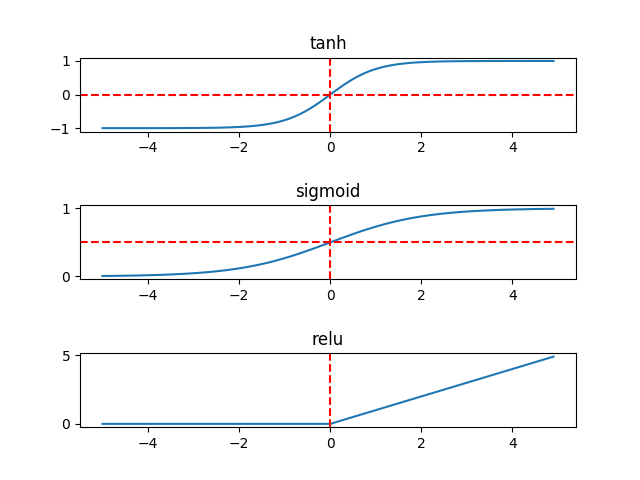


- sigmoid:  y = 1/(1 + e<sup>-x</sup>)   
            
         求导：dy/dx = y(1 -y)
            
            
- tanh: y = (e<sup>x</sup> - e<sup>-x</sup>)/(e<sup>x</sup> + e<sup>-x</sup>)

     求导：dy/dx = 1 -y<sup>2</sup>
      
- relu: y = max(0, x)

      求导： 当x <0 时，dy/dx = 0; 当 x >= 0时，dy/dx = 1


- 相较而言，在隐藏层，tanh函数要优于sigmoid函数，可以认为是sigmoid的平移版本，优势在于其取值范围介于-1 ~ 1之间，数据的平均值为0，而不像sigmoid为0.5，有类似数据中心化的效果。
   
   
- Tanh的诞生比Sigmoid晚一些，sigmoid函数我们提到过有一个缺点就是输出不以0为中心，使得收敛变慢的问题。而Tanh则就是解决了这个问题。


- 但在输出层，sigmoid也许会优于tanh函数，原因在于你希望输出结果的概率落在0 ~ 1 之间，比如二元分类，sigmoid可作为输出层的激活函数。


- 但实际应用中，特别是深层网络在训练时，tanh和sigmoid会在端值趋于饱和，造成训练速度减慢，故深层网络的激活函数默认大多采用relu函数，浅层网络可以采用sigmoid和tanh函数。

- softmax函数，又称归一化指数函数。它是二分类函数sigmoid在多分类上的推广，目的是将多分类的结果以概率的形式展现出来。
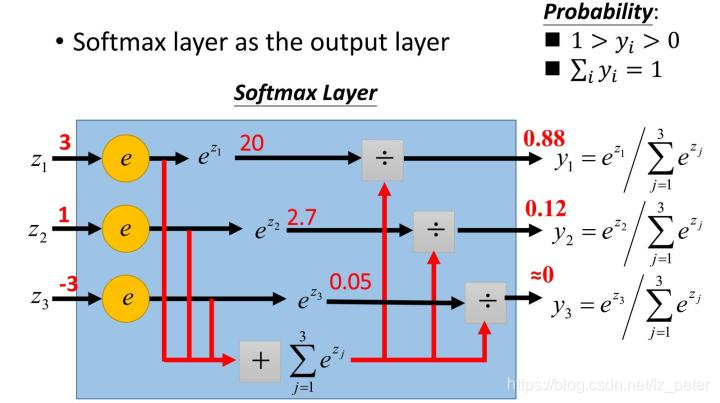


- 公式：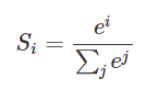

- 公式求导：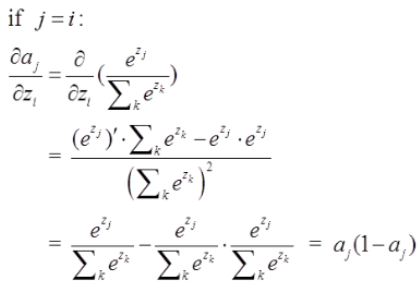
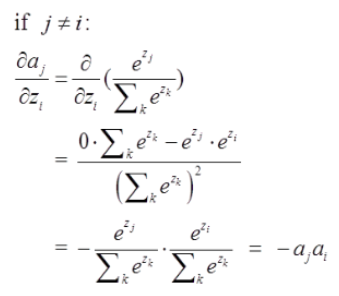


- softmax如何将多分类输出转换为概率，可以分为两步：

  分子：通过指数函数，将实数输出映射到零到正无穷。指数函数的值域取值范围是零到正无穷。softmax第一步就是将模型的预测结果转化到指数函数上，这样保证了概率的非负性。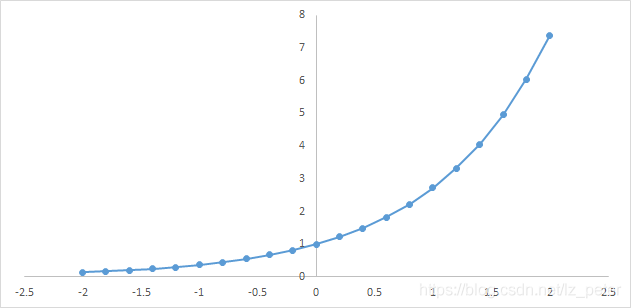

  分母：将所有结果相加，进行归一化。为了确保各个预测结果的概率之和等于1。我们只需要将转换后的结果进行归一化处理。方法就是将转化后的结果除以所有转化后结果之和，可以理解为转化后结果占总数的百分比。这样就得到近似的概率。

# np.random.seed()函数

seed()中的参数被设置了之后，np.random.seed()可以按顺序产生一组固定的数组，如果使用相同的seed()值，则每次生成的随机数都相同。如果不设置这个值，那么每次生成的随机数不同。但是，只在调用的时候seed()一下并不能使生成的随机数相同，需要每次调用都seed()一下，表示种子相同，从而生成的随机数相同。

In [2]:
import numpy as np    # 数组
import pandas as pd    # 数据分析--Dataframe

In [17]:
from keras.models import Sequential
from keras.layers import Dense    # Dense: 全连接层

'''
Scikit-learn的功能包括：

1. 分类（包括 K-Nearest Neighbors)
2. 预处理（包括最小最大归一化）
3. 聚类（包括 K-Means++ 和 K-Means）
4. 回归（包括逻辑回归和线性回归）
''' 
from keras.wrappers.scikit_learn import KerasClassifier

'''
np_utils.to_categorical(y, num_classes)：用于分类，将标签转为one-hot编码，
如num_classes=3，则y应为[0,1,2]。
'''
from keras.utils import np_utils

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [7]:
# 训练好的模型存起来
from keras.models import model_from_json

In [20]:
# keras reproducibility
"""
由于在模型训练的过程中存在大量的随机操作，使得对于同一份代码，
重复运行后得到的结果不一致。因此，为了得到可重复的实验结果，
我们需要对随机数生成器设置一个固定的种子。
"""
seed = 13
# 用于生成指定随机数
np.random.seed(seed)

In [9]:
# load data 
df = pd.read_csv('iris.csv')

# df.values将dataframe转为np.array
# X读取csv的第0到3列，并将其转换为float类型
X = df.values[:,0:4].astype(float)
Y = df.values[:,4]

encoder = LabelEncoder()
# fit_transform先训练再转换，将Y转换成0，1，2
Y_encoeded = encoder.fit_transform(Y)

# 将0编码为[1,0,0]，将1编码为[0,1,0]，将2编码为[0,0,1]
Y_onehot = np_utils.to_categorical(Y_encoeded)

In [10]:
# define a network 
def baseline_model():
    model = Sequential()
    """
    第一个隐藏层有7个node;
    输入层为4维分别代表：花萼长度，花萼宽度，花瓣长度，花瓣宽度
    """
    model.add(Dense(7, input_dim=4, activation='tanh'))
    
    # 输出层, 输出三个分类
    model.add(Dense(3, activation='softmax'))
    
    """
    编译：model.compile()方法用于在配置训练方法时，
    告知训练时用的优化器、损失函数和准确率评测标准
    """
    model.compile(loss='mean_squared_error',
                  optimizer='sgd', metrics=['accuracy'])
    return model

In [11]:
'''
verbose是日志显示，有三个参数可选择，分别为0,1和2。

当verbose=0时，不输出日志信息，进度条、loss、acc这些都不输出
当verbose=1时，带进度条的输出日志信息
当verbose=2时，为每个epoch输出一行记录，和1的区别就是没有进度条
'''
estimator = KerasClassifier(build_fn=baseline_model, 
                            epochs=20, verbose=1) 

In [12]:
# evalute
# shuffle: 每次运行都洗牌数据集顺序
# 为保证结果可重复性，设置随机数生成器random_state为固定的种子seed
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
result = cross_val_score(estimator, X, Y_onehot, cv=kfold)

# 看十次交叉验证的平均值和方差
print("Accuray of cross validation, mean %.2f, std %.2f"
     % (result.mean(), result.std()))

2022-11-14 15:58:44.406142: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-14 15:58:44.408633: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-14 15:58:44.500285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 15:58:44.501010: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.56GHz coreCount: 16 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 119.24GiB/s
2022-11-14 15:58:44.501054: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-14 15:58:44.504576: I tensorflow/stream_executor/platform/def

Epoch 1/20


2022-11-14 15:58:45.773310: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


5/5 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.3241
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.3553
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.2993
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2854 - accuracy: 0.3614
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.3275
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.2785
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2706 - accuracy: 0.3045
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.3191
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.3132
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.3526
Epoch 11/20
5/5 [==============================] -

5/5 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.3407
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.3012
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.3299
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.3511
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.3294
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.3082
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.3416
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.3260
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.3780
Epoch 11/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.3060
Epoch 12/20
5/5 [==============================] 

5/5 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.3601
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.3349
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.3388
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.3228
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.3427
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.3705
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.3647
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.3723
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.3742
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.4017
Epoch 11/20
5/5 [==============================] -

1/1 [==============================] - 0s 254ms/step - loss: 0.2437 - accuracy: 0.4000
Accuray of cross validation, mean 0.49, std 0.13


In [13]:
# save model 
# 存储网络结构
estimator.fit(X, Y_onehot)
model_json = estimator.model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# 存储网络参数、系数，以浮点数类型存储
estimator.model.save_weights("model.h5")
print("save model to disk")

Epoch 1/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2053 - accuracy: 0.3751
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.3757
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1882 - accuracy: 0.4113
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1909 - accuracy: 0.4453
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.5513
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.6041
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.6386
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.6496
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.6398
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.6858
Epoch 11/20
5/5 [======================

In [16]:
# losd model and use it for prediction
json_file = open("model.json", "r")    # 读取网络结构
loaded_model_json = json_file.read()    # loaded_model_json为json文件
json_file.close()

# model_from_json()将json文件转换为模型
loaded_model = model_from_json(loaded_model_json)   
loaded_model.load_weights("model.h5")    # 读取网络参数、系数
print("loaded model from disk")

predicted = loaded_model.predict(X)
print("predicted probability:" + str(predicted))

predicted_label = loaded_model.predict_classes(X)
print("predicted label:" + str(predicted_label))

loaded model from disk
predicted probability:[[0.5906327  0.3322714  0.0770959 ]
 [0.5613369  0.348396   0.09026712]
 [0.5752849  0.3406339  0.08408115]
 [0.5827894  0.33429784 0.08291271]
 [0.5363606  0.3743743  0.08926508]
 [0.569205   0.3416464  0.0891486 ]
 [0.5849666  0.33296767 0.08206575]
 [0.615963   0.31691676 0.06712031]
 [0.58224493 0.3344962  0.08325888]
 [0.59303254 0.33007306 0.07689437]
 [0.5679455  0.3406014  0.09145311]
 [0.58014864 0.33238927 0.08746208]
 [0.58433896 0.33487266 0.08078831]
 [0.54746956 0.34552282 0.10700765]
 [0.5677411  0.34261674 0.0896422 ]
 [0.5769795  0.34246564 0.08055481]
 [0.58386743 0.3372855  0.07884706]
 [0.58384776 0.33355373 0.08259842]
 [0.58384776 0.33355373 0.08259842]
 [0.58384776 0.33355373 0.08259842]
 [0.11758818 0.55071765 0.33169416]
 [0.0524609  0.48245645 0.46508268]
 [0.60697955 0.31919786 0.07382257]
 [0.5949574  0.32658726 0.07845534]
 [0.5703457  0.34367034 0.0859839 ]
 [0.57922596 0.33821732 0.08255673]
 [0.6057469  0.3249

/home/hcx/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
